In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import csv
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import mdshare
import pyemma
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from threading import Timer
#import msmtools.analysis as msmana
#import msmtools
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm

T=310
k=1.380649e-23 




In [4]:
comps = []
with open('project.dat', 'r') as file:
    my_reader = csv.reader(file, delimiter='\t')
    for row in my_reader:
        fields = row[0].split()
        if not fields[0].startswith("#"):
            comps.append(fields[1:])

In [5]:
comps = np.array(comps)
comp1 = comps[:,0].astype(float)
comp2 = comps[:,1].astype(float)
comp3 = comps[:,2].astype(float)
comp4 = comps[:,3].astype(float)
comp5 = comps[:,4].astype(float)
comp6 = comps[:,5].astype(float)
comp7 = comps[:,6].astype(float)
comp8 = comps[:,7].astype(float)
comp9 = comps[:,8].astype(float)
comp10 = comps[:,9].astype(float)





Text(0.5, 1.0, 'PCA1')

<Figure size 1200x1050 with 0 Axes>

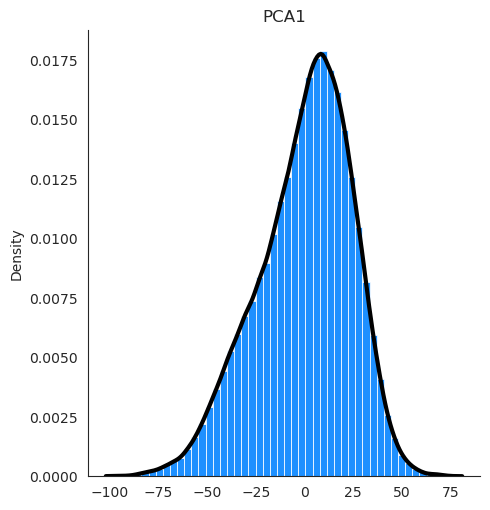

In [6]:
sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp1, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA1")


sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp2, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA2")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp3, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA3")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp4, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA4")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp5, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA5")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp6, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA6")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp7, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA7")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp8, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA8")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp9, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA9")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp10, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA10")

sns.set_style("white")
x = comp1
y = comp2

kwargs = dict( cmap=plt.cm.jet)
plt.figure(figsize=(4,3.5), dpi= 300)
_ = sns.kdeplot(x,y, **kwargs, shade=False, cbar=True, n_levels=11,  zorder=0, cbar_kws = dict(format = '%.3f'), fill=True)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.title("PCA1 vs PCA2")
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.savefig("PCA1vsPC2.png", format="png") 


In [7]:
traj_coord_A = comp1
traj_coord_B = comp2

In [8]:
comp1 = np.array(comp1)
comp2 = np.array(comp2)
dataset12 = pd.DataFrame({'comp2': comp2, 'comp1': list(comp1)}, columns=['comp1', 'comp2'])

In [9]:
dataset12

,comp1,comp2
0,-0.795,9.433
1,-0.225,5.739
2,-5.475,1.742
3,-5.022,4.149
4,-7.055,-1.088
...,...,...
174995,13.037,-6.634
174996,8.489,-14.728
174997,4.533,-13.095
174998,14.679,-20.412


In [10]:
data12 = np.asarray(dataset12)

# Combine the x and y data into a single array
data = np.column_stack((data12[:,0], data12[:,1]))

# Compute the within-cluster sum of squares (inertia) for different values of k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


This code will plot a curve of the within-cluster sum of squares as a function of the number of clusters. You should look for the "elbow" of the curve, which is the point where the decrease in inertia starts to level off. In this case, you can choose the number of clusters to be 4 because that's where the curve starts to level off. However, keep in mind that this is just a heuristic and other methods such as silhouette score can be used to evaluate the optimal number of clusters.

# Cluster the data using K-means
n_clusters = 4  # specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)



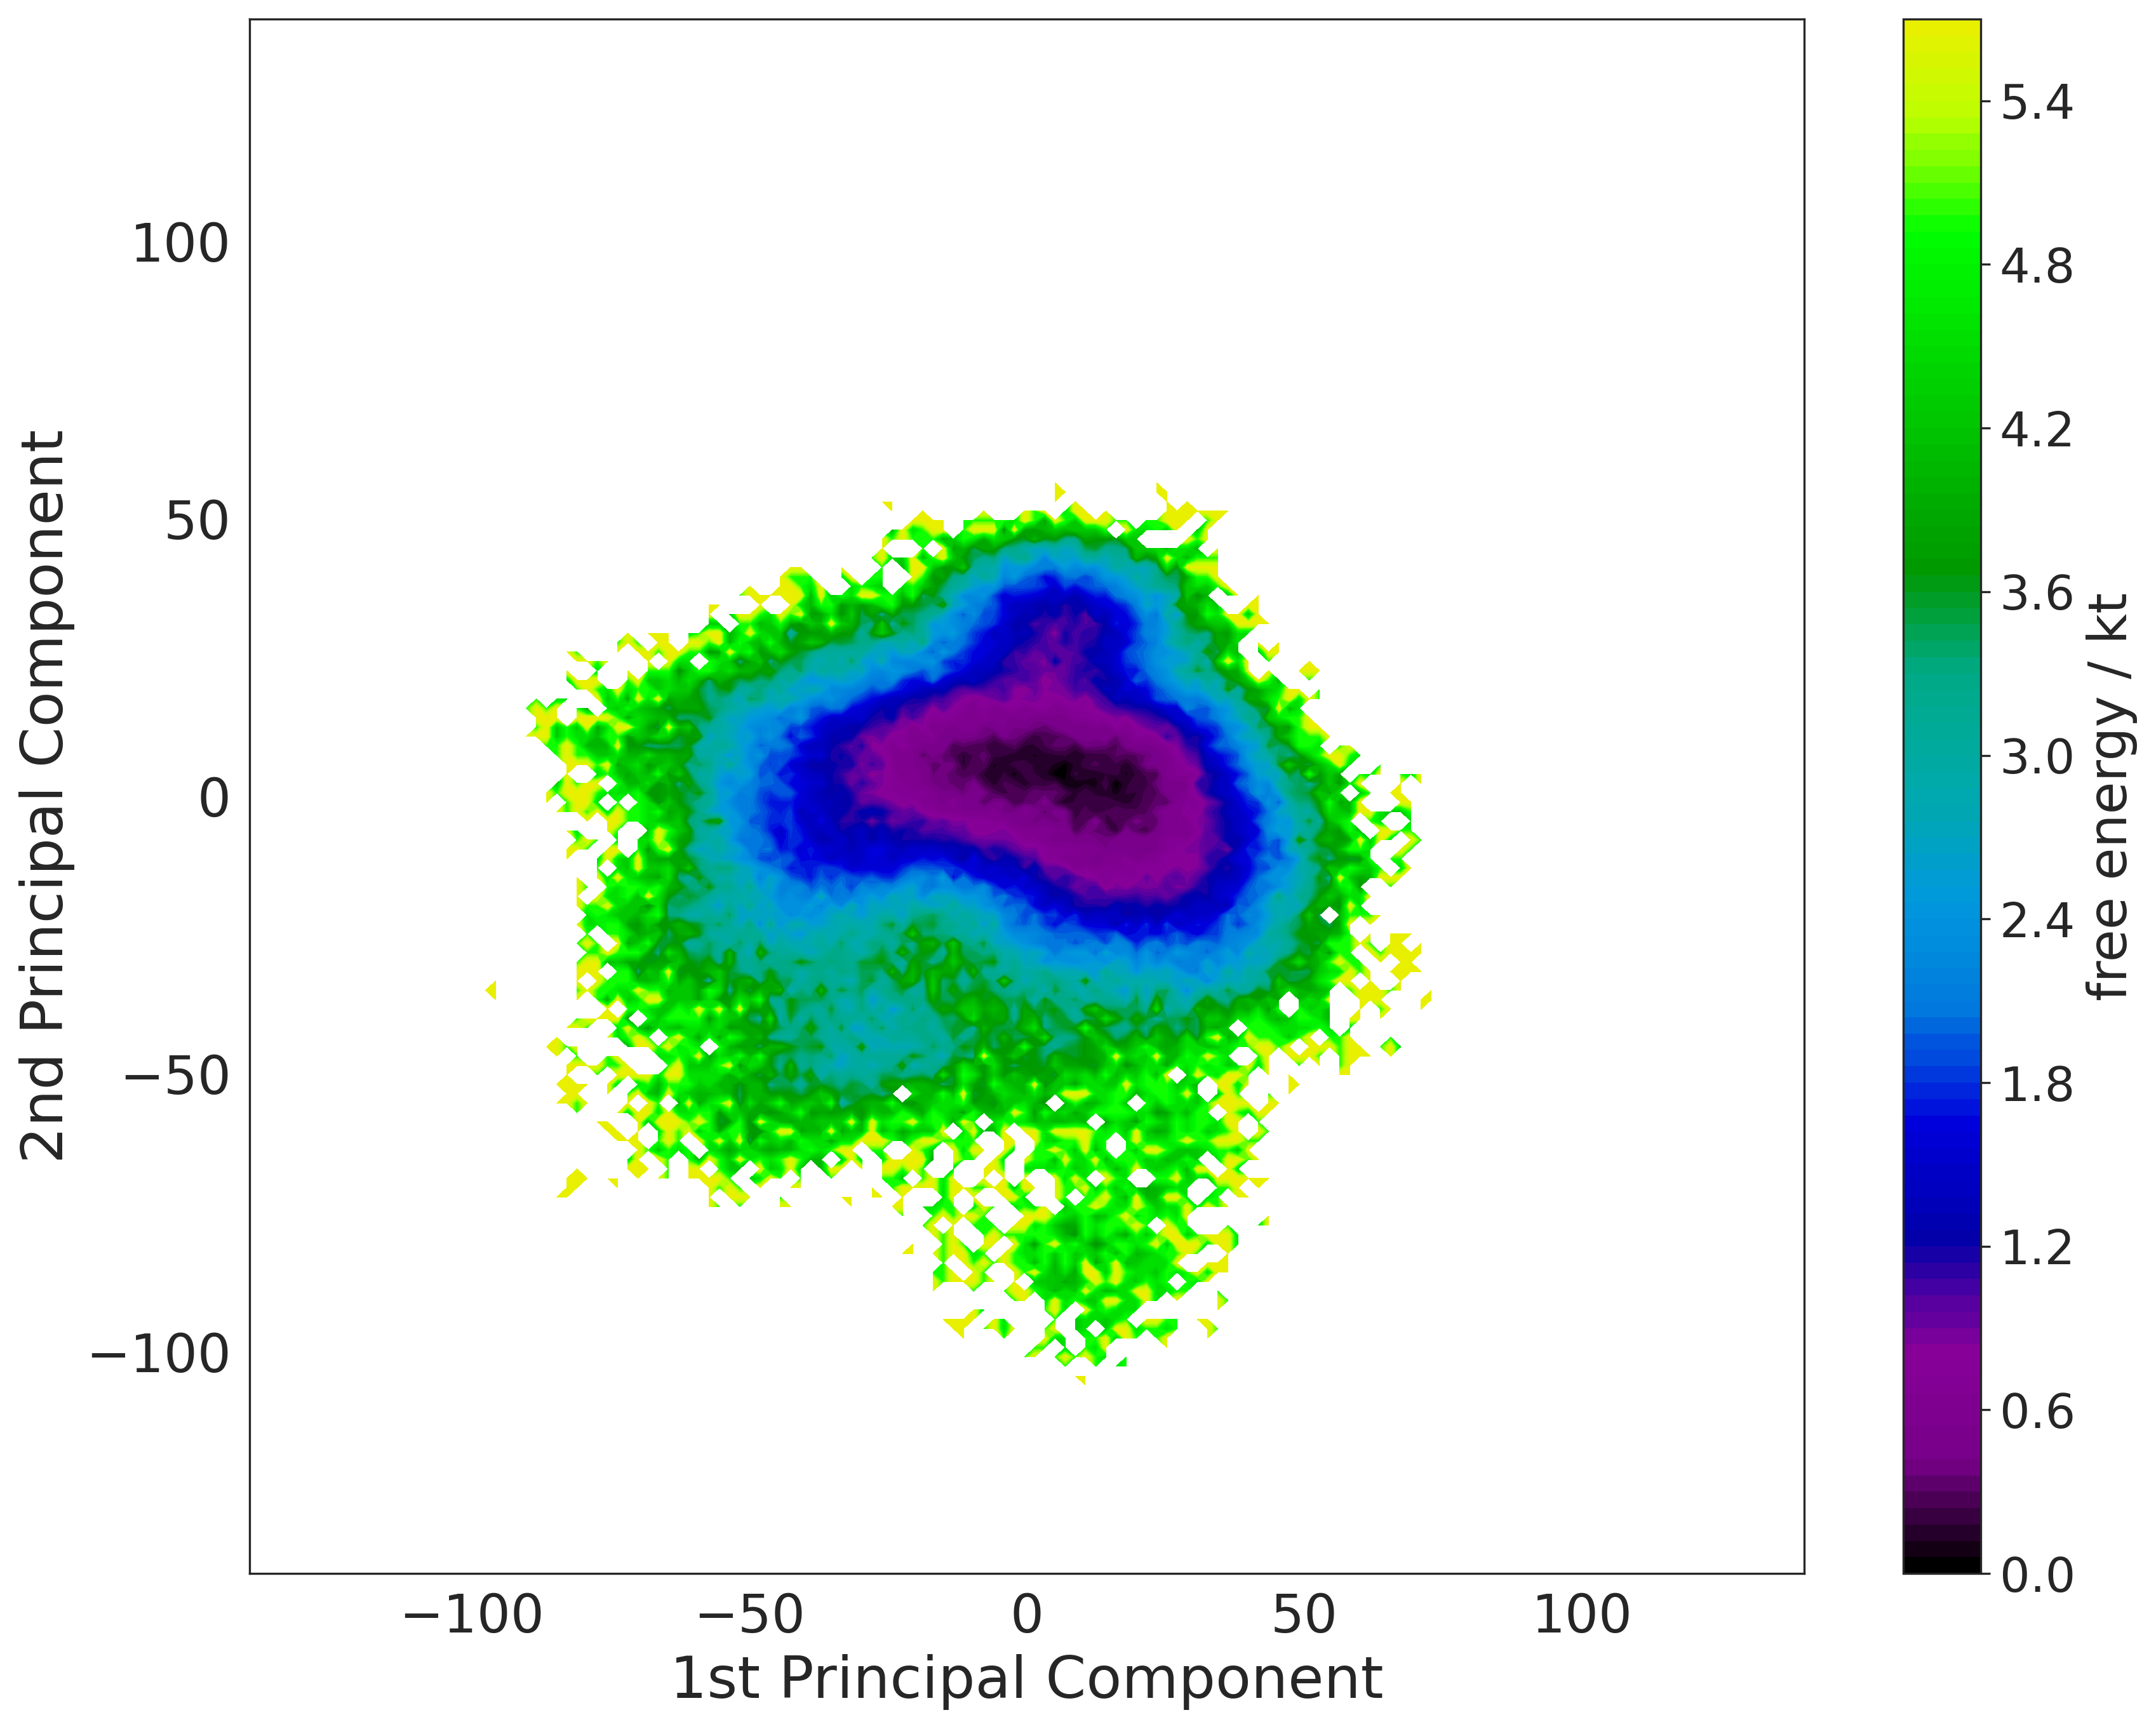

In [16]:
fig, ax, misc = pyemma.plots.plot_free_energy(*data12.T, legacy=False, nbins=100, ncontours=100, avoid_zero_count=False, cmap='nipy_spectral', vmin=0, vmax=8.2)
ax.set_xlabel('1st Principal Component', fontsize = 22)
ax.set_ylabel('2nd Principal Component', fontsize = 22)
ax.set_xlim(-140,140)
ax.set_ylim(-140,140)
ax.set_aspect('equal')


fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.set_dpi(300)


# Set font size for tick labels on the axes
ax.tick_params(axis='both', which='major', labelsize=20)

# Set font size for colorbar labels and tick labels
cbar = misc['cbar']
cbar.ax.tick_params(labelsize = 18)  # Set font size for colorbar tick labels
cbar.ax.set_ylabel("free energy / kt", fontsize=20)  # Set font size for colorbar label

plt.savefig("FE_landscape_lic.png", format="png") 

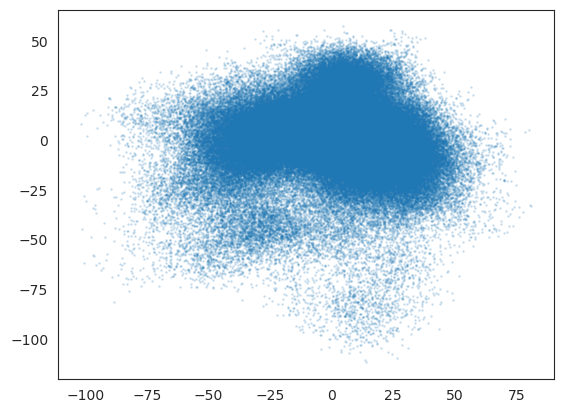

In [17]:
# Extract the first two variables
x = data12[:, 0]  # Assuming the first variable is in the first column
y = data12[:, 1]  # Assuming the second variable is in the second column

# Create a scatterplot
plt.scatter(x, y, s=1, alpha=0.15)

# Add labels and title
ax.set_xlabel('1st Principal Component', fontsize = 22)
ax.set_ylabel('2nd Principal Component', fontsize = 22)
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_aspect('equal')

# Show the plot
plt.show()

In [18]:
# Combine the x and y data into a single array
data = np.column_stack((data12[:,0], data12[:,1]))

# Initialize variables to keep track of the highest silhouette score and the corresponding number of clusters
highest_silhouette = -1
best_n_clusters = None

# Try different number of clusters and calculate the silhouette score for each
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")
    
    # Update the highest silhouette score and the corresponding number of clusters
    if silhouette_avg > highest_silhouette:
        highest_silhouette = silhouette_avg
        best_n_clusters = n_clusters

# Cluster the data using K-means with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(data)


For n_clusters = 2, the average silhouette_score is : 0.392
For n_clusters = 3, the average silhouette_score is : 0.348
For n_clusters = 4, the average silhouette_score is : 0.354
For n_clusters = 5, the average silhouette_score is : 0.346
For n_clusters = 6, the average silhouette_score is : 0.323
For n_clusters = 7, the average silhouette_score is : 0.326
For n_clusters = 8, the average silhouette_score is : 0.335
For n_clusters = 9, the average silhouette_score is : 0.326


This code tries different number of clusters ranging from 2 to 21, fits the K-means algorithm for each number of clusters, calculates the labels for each point, and finally calculates the average silhouette score for each number of clusters using the silhouette_score() function from scikit-learn. The silhouette score is a metric that evaluates the quality of clustering by measuring the distance between data points within a cluster and the distance between data points in different clusters. A higher silhouette score indicates better clustering.